In [75]:
import pandas as pd
import numpy as np


pd.set_option('display.max_columns',None)
pd.set_option('display.min_rows',0)
pd.set_option('display.max_rows',100)

from matplotlib import pyplot as plt
plt.style.use('ggplot')



In [8]:
df = pd.read_csv('opentable_scrapeGOOD.csv')

In [9]:
##cleaning

df['expensive'] = df['expensive'].apply(lambda x: x.count('$'))
df['num_reviews_list'] = df['num_reviews_list'].str.replace('(','')
df['num_reviews_list'] = df['num_reviews_list'].str.replace(')','')
df['num_reviews_list'] = df['num_reviews_list'].apply(lambda x: float(x))
df['rating_list'] = df['rating_list'].apply(lambda x: str(x)[:4])

In [105]:
#df

In [18]:
df['rating_list'][0].strip()

'4.4'

In [19]:
df['rating_list'] = df['rating_list'].apply(lambda x: x.strip())

In [33]:
df['rating_list'] = df['rating_list'].apply(lambda x: float(x))

In [32]:
#df.loc[df.rating_list=='4 st',:]

df.replace(['4 st'], [4.0], inplace=True)
df.replace(['5 st'], [5.0], inplace=True)
df.replace(['3 st'], [3.0], inplace=True)

In [35]:
type(df['expensive'][0])


numpy.int64

In [43]:
df['delivery'][2]

df.loc[df.delivery == '2', :]

,booked_today_list,delivery,expensive,genre,location,num_reviews_list,rating_list,rest_name
2,NaN,2,2,Mexican,Hell's Kitchen,1005.0,4.5,Tacuba Hell's Kitchen
7,NaN,2,2,Thai,Union Square,397.0,4.2,Spice - Union Square
17,NaN,2,4,Japanese,Midtown West,658.0,4.7,Yakitori Tori Shin
23,NaN,2,2,Thai,Midtown West,1.0,3.4,Chai Thai Kitchen
27,NaN,2,3,Mediterranean,Midtown East,68.0,4.6,yara
34,NaN,2,3,Italian,Hell's Kitchen,969.0,4.4,Amarone
44,NaN,2,2,Mexican,Union Square,NaN,NaN,Tortaria
61,NaN,2,3,Italian,Greenwich Village,171.0,4.6,Osteria 57
69,NaN,2,2,American,Hell's Kitchen,98.0,4.1,Route 66
70,NaN,2,2,Japanese,Midtown East,2339.0,4.6,"Gyu-Kaku - New York, NY | Midtown"


In [44]:
df.replace(['2'], ['Both'], inplace=True)

In [51]:
df.replace([' Delivery partners'], ['Delivery'], inplace=True)

In [56]:
df = df.drop('booked_today_list', axis=1)

In [115]:
df['genre'][17]

'Japanese'

In [116]:
df.replace(['Sushi'], ['Japanese'], inplace=True)

In [103]:
#df.groupby(['location', 'genre'])[['num_reviews_list']].agg(np.mean)

In [104]:
#df.location.value_counts()

In [73]:
# df.genre.value_counts().to_frame().loc[df.genre.value_counts()<=10, :]
# df.genre.value_counts().to_frame().loc[df.genre.value_counts()>10, :]

,genre
American,303
Italian,218
French,49
Sushi,46
Contemporary American,45
Japanese,44
Steakhouse,43
Mexican,41
Indian,40
Mediterranean,25


In [ ]:
##Analysis

In [ ]:
plt.scatter(df['rating_list'], df['num_reviews_list'])

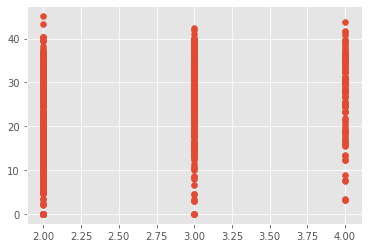

In [100]:
plt.scatter(df['expensive'], df['reivews_rating_log'])

(array([ 12.,   4.,  18.,  27.,  31.,  79., 134., 233., 220.,  41.]),
 array([3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. ]),
 <a list of 10 Patch objects>)

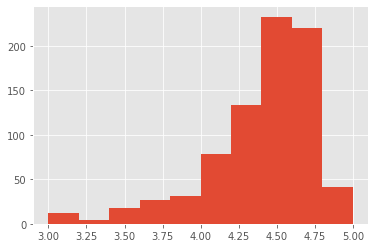

In [79]:
plt.hist(df['rating_list'])

(array([ 29.,  44.,  65.,  75., 108., 136., 174., 107.,  52.,   9.]),
 array([ 0.        ,  4.50948356,  9.01896712, 13.52845068, 18.03793424,
        22.5474178 , 27.05690136, 31.56638492, 36.07586848, 40.58535204,
        45.0948356 ]),
 <a list of 10 Patch objects>)

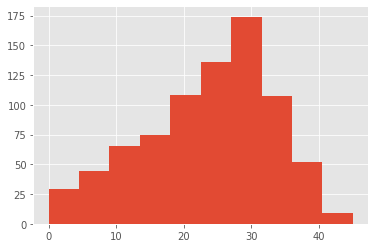

In [99]:
plt.hist(df['reivews_rating_log'])

In [101]:
df.groupby(['delivery'])[['reivews_rating_log']].agg(np.mean)

,reivews_rating_log
delivery,
Takeout,24.076144
Both,25.758406
Delivery,21.814105
Neither,22.690076


In [102]:
df.groupby(['delivery'])[['reivews_rating_log']].agg(np.mean)

,reivews_rating_log
delivery,
Takeout,24.076144
Both,25.758406
Delivery,21.814105
Neither,22.690076


In [97]:
df['reivews_rating_log'] = np.log(df['num_reviews_list'])*df['rating_list']

In [98]:
df

,delivery,expensive,genre,location,num_reviews_list,rating_list,rest_name,reivews_rating_log
0,Takeout,4,Steakhouse,Union Square,312.0,4.4,Strip House Speakeasy,25.269214
1,Neither,2,American,Upper West Side,93.0,4.6,Trump Grill,20.849958
2,Both,2,Mexican,Hell's Kitchen,1005.0,4.5,Tacuba Hell's Kitchen,31.107343
3,Neither,2,Seafood,Chelsea,473.0,4.6,Cull and Pistol,28.331839
4,Takeout,4,Japanese,Midtown West,79.0,4.8,Yakitori Tori Shin - Select Counter,20.973350
5,Neither,3,Italian,Greenwich Village,519.0,4.4,Gradisca,27.508377
6,Takeout,2,Burgers,Union Square,681.0,4.4,5 Napkin Burger - Union Square,28.703674
7,Both,2,Thai,Union Square,397.0,4.2,Spice - Union Square,25.132532
8,Takeout,2,French,Greenwich Village,344.0,4.6,Bar Six,26.866952
9,Delivery,2,Italian,Midtown West,125.0,4.6,Aroma Trattoria,22.210243


In [ ]:
#split genres

In [121]:
genre_df = pd.DataFrame(df.genre.value_counts())

In [126]:
genre_df = genre_df.reset_index()

In [129]:
genre_df = genre_df.rename(columns={'genre':'count', 'index':'genre'})

In [130]:
genre_df

,genre,count
0,American,303
1,Italian,218
2,Japanese,90
3,French,49
4,Contemporary American,45
5,Steakhouse,43
6,Mexican,41
7,Indian,40
8,Mediterranean,25
9,Greek,24


In [132]:
genre_df_top = genre_df.loc[genre_df['count']>= 15, :]

In [133]:
genre_df_bottom = genre_df.loc[genre_df['count']< 15, :]

In [134]:
genre_df_top['count'].sum()

1033

In [135]:
genre_df_bottom['count'].sum()

228

In [140]:
genre_df_top

,genre,count
0,American,303
1,Italian,218
2,Japanese,90
3,French,49
4,Contemporary American,45
5,Steakhouse,43
6,Mexican,41
7,Indian,40
8,Mediterranean,25
9,Greek,24


In [141]:
genre_df_top_list = list(genre_df_top['genre'])

In [151]:
genre_df_bottom_list = list(genre_df_bottom['genre'])

In [150]:
df_topgenre = df.loc[df.genre.isin(genre_df_top_list), :]

In [152]:
df_bottomgenre = df.loc[df.genre.isin(genre_df_bottom_list), :]

(array([126.,  12.,   7.,   1.,   2.,   0.,   1.,   0.,   1.,   1.]),
 array([1.0000e+00, 8.9670e+02, 1.7924e+03, 2.6881e+03, 3.5838e+03,
        4.4795e+03, 5.3752e+03, 6.2709e+03, 7.1666e+03, 8.0623e+03,
        8.9580e+03]),
 <a list of 10 Patch objects>)

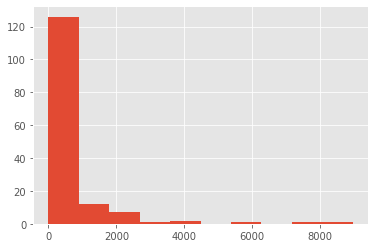

In [155]:
plt.hist(df_bottomgenre['num_reviews_list'])

(array([565.,  52.,  24.,   9.,   4.,   1.,   1.,   1.,   0.,   1.]),
 array([1.00000e+00, 1.81010e+03, 3.61920e+03, 5.42830e+03, 7.23740e+03,
        9.04650e+03, 1.08556e+04, 1.26647e+04, 1.44738e+04, 1.62829e+04,
        1.80920e+04]),
 <a list of 10 Patch objects>)

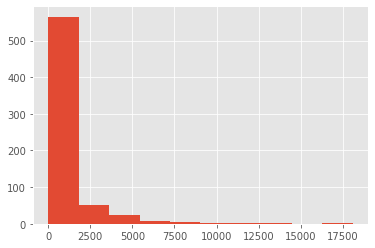

In [156]:
plt.hist(df_topgenre['num_reviews_list'])

In [ ]:
#split locations

In [ ]:
location_df = pd.DataFrame(df.location.value_counts())

In [ ]:
location_df

In [188]:
location_df = location_df.reset_index()

In [189]:
location_df

,index,location
0,Midtown West,201
1,Midtown East,159
2,Murray Hill,141
3,Chelsea,128
4,Theater District / Times Square,104
5,Gramercy / Flatiron,102
6,Garment District / Flower District,54
7,Hell's Kitchen,40
8,Upper East Side,39
9,NoMad,32


In [190]:
location_df = location_df.rename(columns={'location':'count', 'index':'location'})

In [191]:
location_df

,location,count
0,Midtown West,201
1,Midtown East,159
2,Murray Hill,141
3,Chelsea,128
4,Theater District / Times Square,104
5,Gramercy / Flatiron,102
6,Garment District / Flower District,54
7,Hell's Kitchen,40
8,Upper East Side,39
9,NoMad,32


In [192]:
location_df_top = location_df.loc[genre_df['count']>= 15, :]

In [193]:
location_df_bottom = location_df.loc[genre_df['count']< 15, :]

In [196]:
location_df_top_list = list(location_df_top['location'])
location_df_bottom_list = list(location_df_bottom['location'])
df_toplocation = df.loc[df.location.isin(location_df_top_list), :]
df_bottomlocation = df.loc[df.location.isin(location_df_bottom_list), :]

In [224]:
df

,delivery,expensive,genre,location,num_reviews_list,rating_list,rest_name,reivews_rating_log
0,Takeout,4,Steakhouse,Union Square,312.0,4.4,Strip House Speakeasy,25.269214
1,Neither,2,American,Upper West Side,93.0,4.6,Trump Grill,20.849958
2,Both,2,Mexican,Hell's Kitchen,1005.0,4.5,Tacuba Hell's Kitchen,31.107343
3,Neither,2,Seafood,Chelsea,473.0,4.6,Cull and Pistol,28.331839
4,Takeout,4,Japanese,Midtown West,79.0,4.8,Yakitori Tori Shin - Select Counter,20.973350
5,Neither,3,Italian,Greenwich Village,519.0,4.4,Gradisca,27.508377
6,Takeout,2,Burgers,Union Square,681.0,4.4,5 Napkin Burger - Union Square,28.703674
7,Both,2,Thai,Union Square,397.0,4.2,Spice - Union Square,25.132532
8,Takeout,2,French,Greenwich Village,344.0,4.6,Bar Six,26.866952
9,Delivery,2,Italian,Midtown West,125.0,4.6,Aroma Trattoria,22.210243


In [ ]:
#finding density of american restaurants per neighborhood

In [216]:
df_toplocation_american = df_toplocation.loc[df_toplocation['genre']=='American', :]

In [217]:
df_toplocation_american_groupby = df_toplocation_american.groupby(['location'])[['rest_name']].nunique()

In [227]:
df_toplocation_american_groupby2 = df_toplocation_american.groupby(['location'])[['reivews_rating_log']].agg(np.mean)

In [229]:
df_toplocation_american_groupby2

,reivews_rating_log
location,
Chelsea,15.883942
East Village,27.737741
Garment District / Flower District,3.195770
Gramercy / Flatiron,30.121955
Greenwich Village,30.230894
Hell's Kitchen,20.575267
Kips Bay,4.789614
Meatpacking District,10.223921
Midtown East,24.356550


In [218]:
df_toplocation_american_groupby

,rest_name
location,
Chelsea,32
East Village,2
Garment District / Flower District,22
Gramercy / Flatiron,21
Greenwich Village,4
Hell's Kitchen,11
Kips Bay,2
Meatpacking District,3
Midtown East,34


In [220]:
df_merge = pd.merge(df_toplocation_american_groupby, location_df_top, on='location')

In [222]:
df_merge['density'] = df_merge['rest_name'] / df_merge['count']

In [230]:
df_merge2 = pd.merge(df_merge, df_toplocation_american_groupby2, on='location')

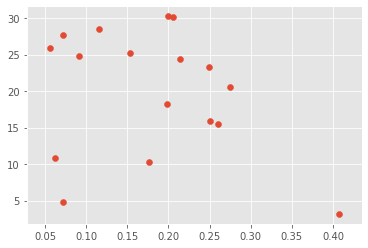

In [233]:
plt.scatter(df_merge2['density'], df_merge2['reivews_rating_log'])

In [231]:
df_merge2

,location,rest_name,count,density,reivews_rating_log
0,Chelsea,32,128,0.250000,15.883942
1,East Village,2,28,0.071429,27.737741
2,Garment District / Flower District,22,54,0.407407,3.195770
3,Gramercy / Flatiron,21,102,0.205882,30.121955
4,Greenwich Village,4,20,0.200000,30.230894
5,Hell's Kitchen,11,40,0.275000,20.575267
6,Kips Bay,2,28,0.071429,4.789614
7,Meatpacking District,3,17,0.176471,10.223921
8,Midtown East,34,159,0.213836,24.356550
9,Midtown West,50,201,0.248756,23.227629


In [223]:
df_merge

,location,rest_name,count,density
0,Chelsea,32,128,0.250000
1,East Village,2,28,0.071429
2,Garment District / Flower District,22,54,0.407407
3,Gramercy / Flatiron,21,102,0.205882
4,Greenwich Village,4,20,0.200000
5,Hell's Kitchen,11,40,0.275000
6,Kips Bay,2,28,0.071429
7,Meatpacking District,3,17,0.176471
8,Midtown East,34,159,0.213836
9,Midtown West,50,201,0.248756


In [ ]:
#italina food same thing

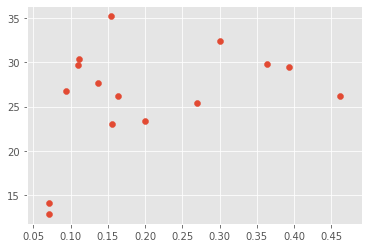

In [236]:
df_toplocation_italian = df_toplocation.loc[df_toplocation['genre']=='Italian', :]
df_toplocation_italian_groupby = df_toplocation_italian.groupby(['location'])[['rest_name']].nunique()
df_toplocation_italian_groupby2 = df_toplocation_italian.groupby(['location'])[['reivews_rating_log']].agg(np.mean)
df_merge_italian = pd.merge(df_toplocation_italian_groupby, location_df_top, on='location')
df_merge_italian['density'] = df_merge_italian['rest_name'] / df_merge_italian['count']
df_merge_italian2 = pd.merge(df_merge_italian, df_toplocation_italian_groupby2, on='location')
plt.scatter(df_merge_italian2['density'], df_merge_italian2['reivews_rating_log'])

In [ ]:
#japanese food same thing

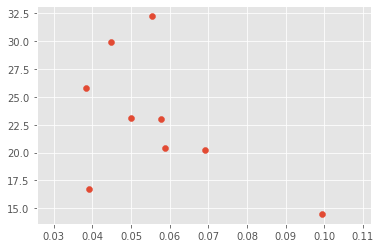

In [237]:
df_toplocation_japanese = df_toplocation.loc[df_toplocation['genre']=='Japanese', :]
df_toplocation_japanese_groupby = df_toplocation_japanese.groupby(['location'])[['rest_name']].nunique()
df_toplocation_japanese_groupby2 = df_toplocation_japanese.groupby(['location'])[['reivews_rating_log']].agg(np.mean)
df_merge_japanese = pd.merge(df_toplocation_japanese_groupby, location_df_top, on='location')
df_merge_japanese['density'] = df_merge_japanese['rest_name'] / df_merge_japanese['count']
df_merge_japanese2 = pd.merge(df_merge_japanese, df_toplocation_japanese_groupby2, on='location')
plt.scatter(df_merge_japanese2['density'], df_merge_japanese2['reivews_rating_log'])


In [238]:
df_merge_japanese2

,location,rest_name,count,density,reivews_rating_log
0,Chelsea,5,128,0.039062,16.698038
1,Gramercy / Flatiron,6,102,0.058824,20.438457
2,Hell's Kitchen,2,40,0.050000,23.131721
3,Kips Bay,6,28,0.214286,NaN
4,Meatpacking District,2,17,0.117647,NaN
5,Midtown East,11,159,0.069182,20.252880
6,Midtown West,9,201,0.044776,29.928888
7,Murray Hill,14,141,0.099291,14.493255
8,NoMad,2,32,0.062500,NaN
9,Rockefeller Center Midtown,2,23,0.086957,NaN


In [219]:
location_df_top

,location,count
0,Midtown West,201
1,Midtown East,159
2,Murray Hill,141
3,Chelsea,128
4,Theater District / Times Square,104
5,Gramercy / Flatiron,102
6,Garment District / Flower District,54
7,Hell's Kitchen,40
8,Upper East Side,39
9,NoMad,32


In [239]:
# groupby_location_genre = df_toplocation.groupby(['genre', 'location'])[['rest_name']].nunique()

In [240]:
# groupby_location_genre

In [241]:
# groupby_location_genre.set_index('genre')

In [205]:
# df_merge = pd.merge(groupby_location_genre, location_df_top, on='location', left_index = True)

In [242]:
# df_merge

In [208]:
# location_df_top2 = location_df_top.set_index('location')

In [212]:
# location_df_top2_dict = location_df_top2.to_dict()

In [214]:
# location_df_top2_dict = {'Midtown West': 201,
#   'Midtown East': 159,
#   'Murray Hill': 141,
#   'Chelsea': 128,
#   'Theater District / Times Square': 104,
#   'Gramercy / Flatiron': 102,
#   'Garment District / Flower District': 54,
#   "Hell's Kitchen": 40,
#   'Upper East Side': 39,
#   'NoMad': 32,
#   'East Village': 28,
#   'Kips Bay': 28,
#   'West Village': 26,
#   'Rockefeller Center Midtown': 23,
#   'SoHo': 22,
#   'Greenwich Village': 20,
#   'Union Square': 18,
#   'Meatpacking District': 17}

In [ ]:
# expensive and delviery stuff

In [243]:
df.groupby(['delivery'])[['reivews_rating_log']].agg(np.mean)

,reivews_rating_log
delivery,
Takeout,24.076144
Both,25.758406
Delivery,21.814105
Neither,22.690076


In [244]:
df.groupby(['expensive'])[['reivews_rating_log']].agg(np.mean)

,reivews_rating_log
expensive,
2,20.888260
3,26.112448
4,27.820860


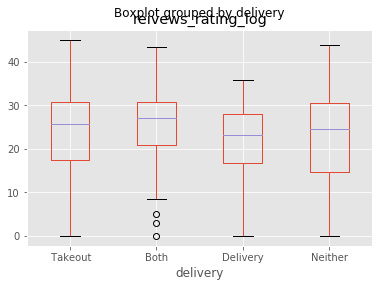

In [248]:
df.boxplot(by='delivery', column='reivews_rating_log')

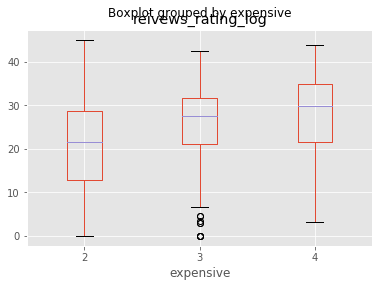

In [249]:
df.boxplot(by='expensive', column='reivews_rating_log')

In [245]:
df

,delivery,expensive,genre,location,num_reviews_list,rating_list,rest_name,reivews_rating_log
0,Takeout,4,Steakhouse,Union Square,312.0,4.4,Strip House Speakeasy,25.269214
1,Neither,2,American,Upper West Side,93.0,4.6,Trump Grill,20.849958
2,Both,2,Mexican,Hell's Kitchen,1005.0,4.5,Tacuba Hell's Kitchen,31.107343
3,Neither,2,Seafood,Chelsea,473.0,4.6,Cull and Pistol,28.331839
4,Takeout,4,Japanese,Midtown West,79.0,4.8,Yakitori Tori Shin - Select Counter,20.973350
5,Neither,3,Italian,Greenwich Village,519.0,4.4,Gradisca,27.508377
6,Takeout,2,Burgers,Union Square,681.0,4.4,5 Napkin Burger - Union Square,28.703674
7,Both,2,Thai,Union Square,397.0,4.2,Spice - Union Square,25.132532
8,Takeout,2,French,Greenwich Village,344.0,4.6,Bar Six,26.866952
9,Delivery,2,Italian,Midtown West,125.0,4.6,Aroma Trattoria,22.210243


In [ ]:
#with and without nulls

In [181]:
df

,delivery,expensive,genre,location,num_reviews_list,rating_list,rest_name,reivews_rating_log
0,Takeout,4,Steakhouse,Union Square,312.0,4.4,Strip House Speakeasy,25.269214
1,Neither,2,American,Upper West Side,93.0,4.6,Trump Grill,20.849958
2,Both,2,Mexican,Hell's Kitchen,1005.0,4.5,Tacuba Hell's Kitchen,31.107343
3,Neither,2,Seafood,Chelsea,473.0,4.6,Cull and Pistol,28.331839
4,Takeout,4,Japanese,Midtown West,79.0,4.8,Yakitori Tori Shin - Select Counter,20.973350
5,Neither,3,Italian,Greenwich Village,519.0,4.4,Gradisca,27.508377
6,Takeout,2,Burgers,Union Square,681.0,4.4,5 Napkin Burger - Union Square,28.703674
7,Both,2,Thai,Union Square,397.0,4.2,Spice - Union Square,25.132532
8,Takeout,2,French,Greenwich Village,344.0,4.6,Bar Six,26.866952
9,Delivery,2,Italian,Midtown West,125.0,4.6,Aroma Trattoria,22.210243
